## **Rocktype Propagation**

####**Authenticate to access Google Drive**

In [73]:
#Installer
#pip install keras --upgrade
!pip install -q git+https://github.com/tensorflow/docs

#Auntenthication
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

####**Import supporting libraries**

In [0]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os import listdir
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from keras.optimizers import SGD, adam
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


####**Data Loading**

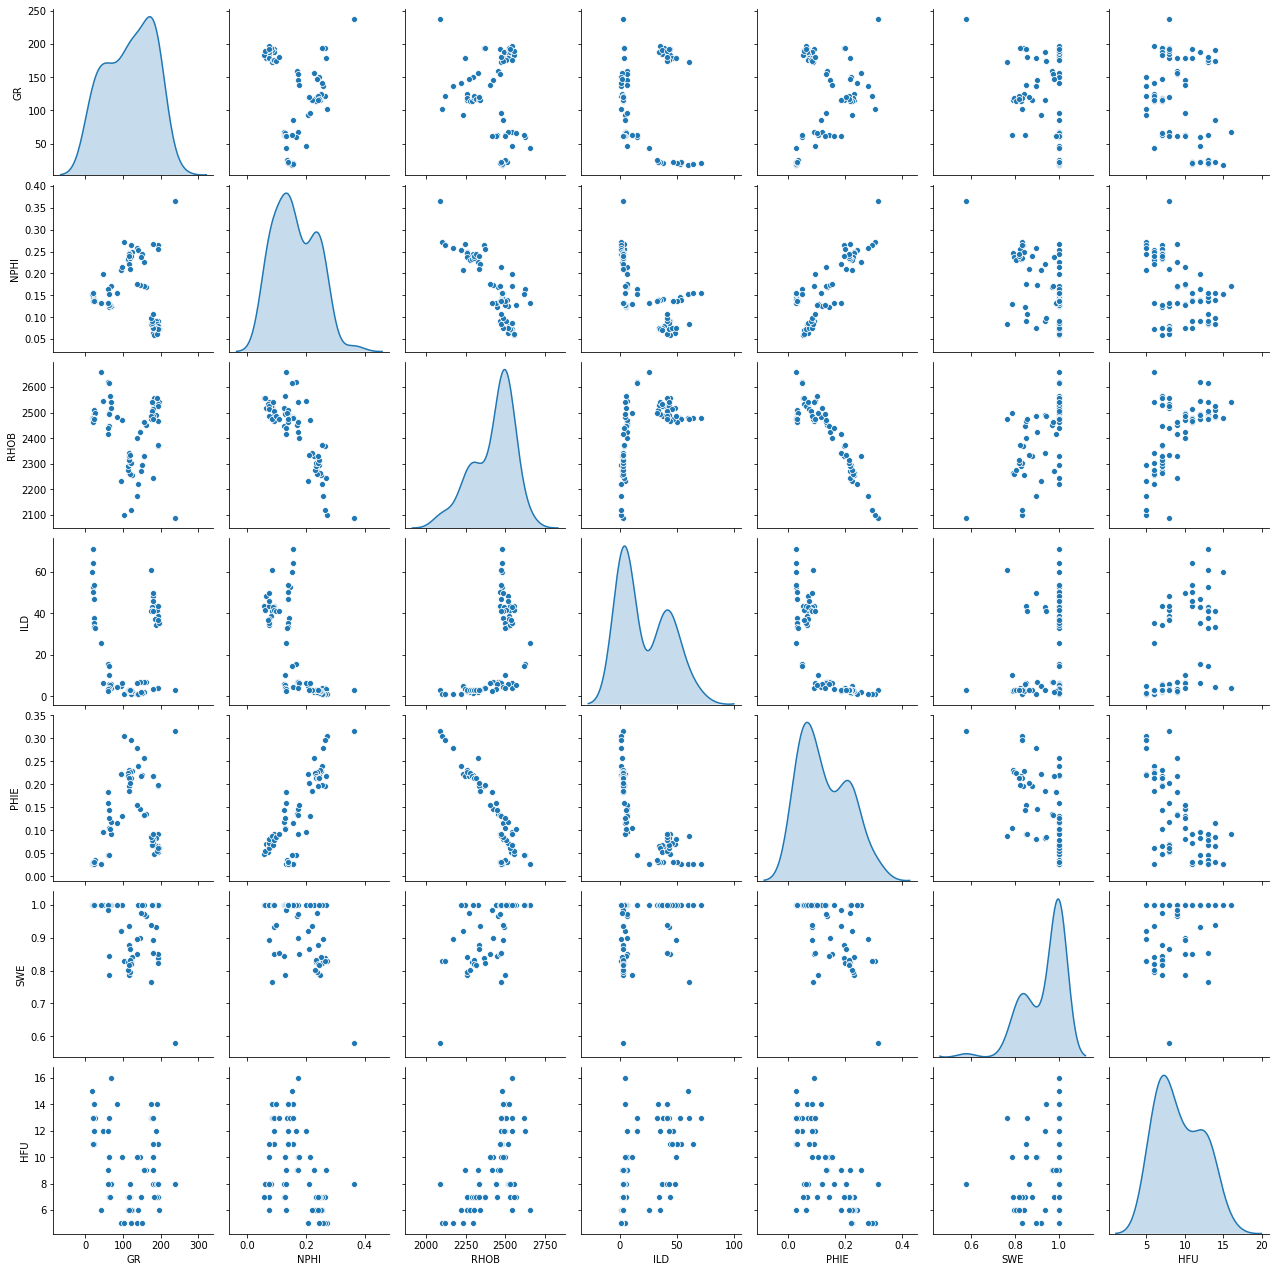

In [188]:
def LoadData(url,filename):
  fluff, id = url.split('=')
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile(filename)
  return filename

LoadData(url="https://drive.google.com/open?id=1IIpRObLMazWzdjO-2nJxID1SdW2Nh_VV", filename="hfu_1.csv")
dset = pd.read_csv("hfu_1.csv").set_index('Well')
dset.head(5)
dset = dset.dropna()
sns.pairplot(dset[["GR", "NPHI", "RHOB", "ILD", "PHIE", "SWE", "HFU"]], diag_kind="kde")

####**Pre-processing**

In [0]:
db = dset[['PHIE','SWE','ILD','HFU']].copy()
X = db.iloc[:,0:3].values
Y = db.iloc[:,-1].values
test = 0.20
seed = 0
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test, random_state=seed)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

####**Model**

In [0]:
def ModelAnn():
        classifier = Sequential([
          Dense(256, activation = 'relu', input_dim=3),
          Dense(128,activation = 'relu'), 
          Dense(1)                     
        ])
        lr = 0.1
        decay = 0.0001
        momentum = 0.75
        sgd= SGD(lr=lr, momentum=momentum, decay=decay,nesterov=False)
        adm = adam(lr=lr,decay=decay)
        classifier.compile(optimizer='sgd', loss='mse', metrics=['accuracy','mse','msle'])
        return classifier

####**Train, test, predict**

In [182]:
#classifier = KerasClassifier(build_fn=ModelAnn, epochs=300, batch_size=5, verbose=1)
classifier = ModelAnn()
history = classifier.fit(X_train, Y_train, validation_split=0.2, epochs=300, batch_size=5, verbose=1)
Y_predict = classifier.predict(X_test)

Train on 44 samples, validate on 12 samples
Epoch 1/300
44/44 [==============================] - 1s 13ms/sample - loss: 45.0157 - acc: 0.0000e+00 - mean_squared_error: 45.0157 - mean_squared_logarithmic_error: 1.4429 - val_loss: 9.3981 - val_acc: 0.0000e+00 - val_mean_squared_error: 9.3981 - val_mean_squared_logarithmic_error: 0.1100
Epoch 2/300
44/44 [==============================] - 0s 1ms/sample - loss: 8.6056 - acc: 0.0000e+00 - mean_squared_error: 8.6056 - mean_squared_logarithmic_error: 0.0840 - val_loss: 5.6572 - val_acc: 0.0000e+00 - val_mean_squared_error: 5.6572 - val_mean_squared_logarithmic_error: 0.0590
Epoch 3/300
44/44 [==============================] - 0s 1ms/sample - loss: 4.6402 - acc: 0.0000e+00 - mean_squared_error: 4.6402 - mean_squared_logarithmic_error: 0.0422 - val_loss: 5.5528 - val_acc: 0.0000e+00 - val_mean_squared_error: 5.5528 - val_mean_squared_logarithmic_error: 0.0534
Epoch 4/300
44/44 [==============================] - 0s 1ms/sample - loss: 4.5319 - ac

####**Check**

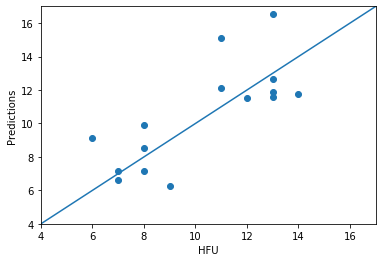

In [183]:
plt.scatter(Y_test, Y_predict)
plt.xlabel('HFU')
plt.ylabel('Predictions')
lims = [4, 17]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

####**History**

Text(0, 0.5, 'MSE [MPG^2]')

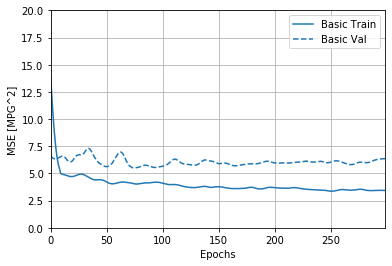

In [186]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(5)
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = 'mean_squared_error')
plt.ylim([0, 20])
plt.ylabel('MSE [MPG^2]')

####**Propagation**

In [0]:
LoadData(url="https://drive.google.com/open?id=149tZfPCbuuLamIpirea-j1dYaI2lPOrI", filename="wire_jtb.csv")
wire = pd.read_csv("wire_jtb.csv").set_index('WELL')
LoadData(url="https://drive.google.com/open?id=1gXlDJwvZidZxeWT3x1cCxbCp_zTSz0GC", filename="phiswe_jtb.csv")
phisw = pd.read_csv("phiswe.csv").set_index('WELL')

In [189]:
print(ROOT)

NameError: ignored